# Rossmann Sales Prediction - Data Cleaning & Merging

#### Nhiệm vụ chính
1. Đọc và hiểu dữ liệu trong `train.csv`, `test.csv`, `store.csv`.
2. Kiểm tra và xử lý giá trị thiếu (NaN).
3. Loại bỏ dữ liệu không hợp lệ (ngày cửa hàng đóng cửa, Sales = 0).
4. Chuẩn hóa kiểu dữ liệu (categorical, numeric).
5. Gộp (merge) dữ liệu train và store thành một file hoàn chỉnh.
6. Xuất file `cleaned_data.csv` để sử dụng cho bước kế tiếp.

#### Kết quả bàn giao
- File đầu ra: `cleaned_data.csv`
- Biểu đồ mô tả dữ liệu (Histogram, Boxplot)
- Ghi chú các quyết định xử lý dữ liệu (fillna, dropna, transform,...)

# ***1. Data Cleaning & Merging***

## ***1. Đọc và hiểu dữ liệu trong dataset***

### Thêm thư viện

In [7]:
# Importing basic libraries for data processing
import numpy as np
import pandas as pd
import math
from datetime import datetime

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Tải dữ liệu

In [8]:
# Load Dataset by mounting drive in colab

df_rossmann= pd.read_csv(r"D:\IS403_project\rossmann-sales-forecasting-using-ml\rossmann-store-sales\train.csv")
df_store= pd.read_csv(r"D:\IS403_project\rossmann-sales-forecasting-using-ml\rossmann-store-sales\store.csv")

### Nhìn nhận đầu tiên về tập dữ liệu

In [9]:
# Dataset First Look of rossmann dataset
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
# Dataset First Look of store dataset
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Đếm số lượng hàng và cột trong tập dữ liệu

In [11]:
# Dataset Rows & Columns count
print(f"Rossmann dataset: Rows={df_rossmann.shape[0]}, Columns={df_rossmann.shape[1]}")
print(f"Store dataset: Rows={df_store.shape[0]}, Columns={df_store.shape[1]}")

Rossmann dataset: Rows=1017209, Columns=9
Store dataset: Rows=1115, Columns=10


### Thông tin tập dữ liệu

In [12]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Giá trị trùng lặp

In [14]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {df_rossmann.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {df_store.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


Không có giá trị trùng lặp nào ở trong tập dữ liệu của chúng tôi

#### Giá trị thiếu/ Giá trị Null

In [15]:
# Missing Values/Null Values Count
print("-"*50)
print(f"Null values count in Rossmann dataset:\n{df_rossmann.isna().sum()}\n")
print("-"*50)
print(f"Null values count in Store dataset:\n{df_store.isna().sum()}")
print("-"*50)
print(f"Infinite values count in Rossmann dataset:\n{df_rossmann.isin([np.inf, -np.inf]).sum()}\n")
print("-"*50)
print(f"Infinite values count in Store dataset:\n{df_store.isin([np.inf, -np.inf]).sum()}")
print("-"*50)

--------------------------------------------------
Null values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

--------------------------------------------------
Null values count in Store dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
--------------------------------------------------
Infinite values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

----------------

Chúng tôi không có giá trị null hoặc vô hạn trong tập dữ liệu của Rossmann nhưng có một số giá trị null trong tập dữ liệu của Store và chúng tôi phải xử lý điều đó trong tương lai.

<Axes: >

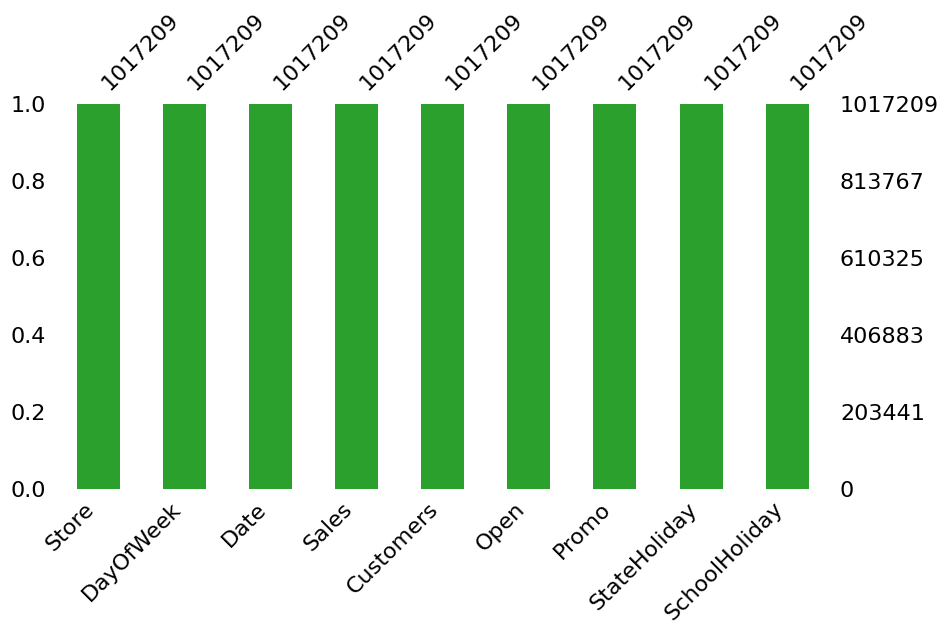

In [16]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:green")

<Axes: >

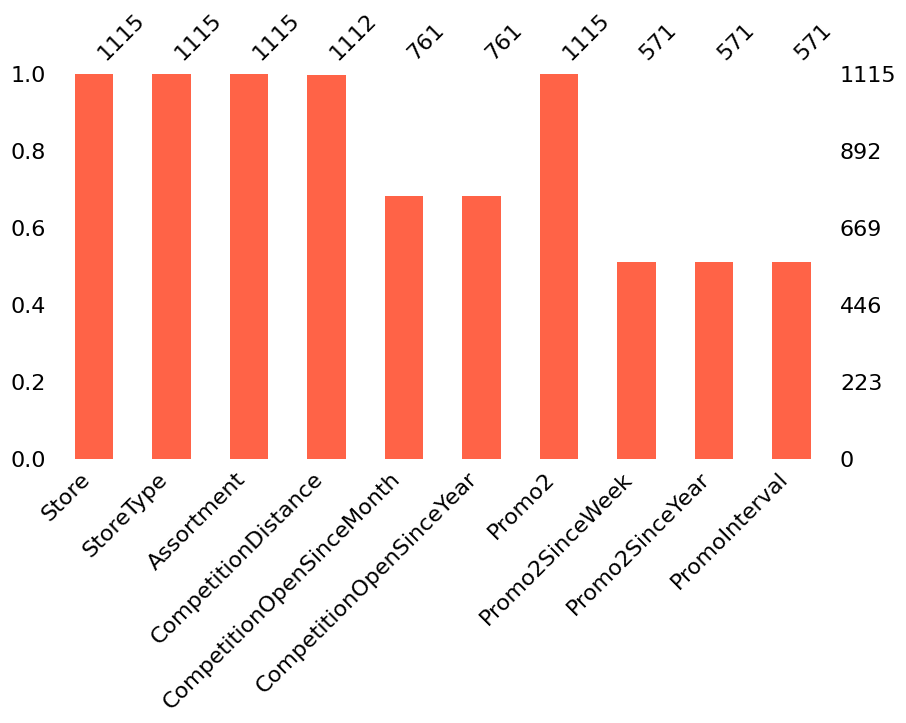

In [17]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="tomato")

### *Cho tới lúc này thì chúng tôi đã biết được những gì về tập dữ liệu này?*


 có     Tổng cộng có 4 tính năng phân loại trong tập dữ liệu 'Rossmann' là Open, Promo, StateHoliday và SchoolHoliday, và 'Stores' chứa các tính năng phân loại là StoreType, Assortment, Promo2, PromoInterval.

Đến giờ, chúng tôi đã biết những điểm sau về tập dữ liệu của mình:
1. **Tập dữ liệu 'Rossmann'** có **1.017.209 hàng và 9 cột** và không có giá trị null nào.
2. **Tập dữ liệu 'Stores'** có **1.115 hàng và 10 cột**. Nó chứa giá trị null trong tổng cộng sáu tính năng như: CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear và PromoInterval.
3. Không có **giá trị trùng lặp** nào có mặt trong cả hai tập dữ liệu.
4. Tổng cộng có 4 **thuộc tính phân loại** trong tập dữ liệu 'Rossmann' là Open, Promo, StateHoliday và SchoolHoliday, và 'Stores' chứa các tính năng phân loại là StoreType, Assortment, Promo2, PromoInterval.

## ***2. Hiểu về các biến số***

In [18]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{df_rossmann.columns.tolist()}")
print(f"Column names of Store dataset is:\n{df_store.columns.tolist()}")

Column names of Rossmann dataset is:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Column names of Store dataset is:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [19]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-01-02,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [20]:
# Store dataset describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Mô tả biến số

**Rossmann Stores Data.csv** - dữ liệu lịch sử bao gồm Doanh số

**Store.csv** - thông tin bổ sung về các cửa hàng

**Các trường dữ liệu**

Hầu hết các trường đều tự giải thích. Dưới đây là mô tả cho những trường không tự giải thích.

**Store** - một ID duy nhất cho mỗi cửa hàng

**Sales** - doanh thu cho bất kỳ ngày nào (đây là thứ bạn đang dự đoán)

**Customers** - số lượng khách hàng trong một ngày nhất định

**Open** - một chỉ báo cho biết cửa hàng có mở cửa hay không: 0 = đóng cửa, 1 = mở cửa

**StateHoliday** - cho biết một ngày lễ tiểu bang

**SchoolHoliday** - cho biết nếu (Cửa hàng, Ngày) bị ảnh hưởng bởi việc đóng cửa các trường công lập

**StoreType** - phân biệt giữa 4 kiểu mô hình cửa hàng khác nhau: a, b, c, d

**Assortment** - mô tả mức độ phối hợp: a = cơ bản, b = bổ sung, c = mở rộng

**CompetitionDistance** - khoảng cách tính bằng mét đến cửa hàng đối thủ gần nhất

**CompetitionOpenSince[Month/Year]** - cho biết năm và tháng gần đúng của thời gian cửa hàng đối thủ gần nhất được mở

**Promo** - cho biết liệu một cửa hàng có đang chạy chương trình khuyến mãi vào ngày đó không

**Promo2** - Promo2 là một chương trình khuyến mãi liên tục và nối tiếp cho một số cửa hàng: 0 = cửa hàng không tham gia, 1 = cửa hàng tham gia

**Promo2Since[Year/Week]** - mô tả năm và tuần lịch khi cửa hàng bắt đầu tham gia Promo2

**PromoInterval** - mô tả các khoảng thời gian liên tiếp khi Promo2 được bắt đầu, nêu tên các tháng mà chương trình khuyến mãi được bắt đầu lại. Ví dụ: "Tháng 2, Tháng 5, Tháng 8, Tháng 11" có nghĩa là mỗi vòng bắt đầu vào tháng 2, tháng 5, tháng 8, tháng 11 của bất kỳ năm nào cho cửa hàng đó.

### Kiểm tra giá trị duy nhất cho mỗi biến.

In [21]:
# Check Unique Values for each variable.
for i in df_rossmann.columns.tolist():
  print("The Unique Values of', i, 'are:", df_rossmann[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [22]:
# Check Unique Values for each variable.
for j in df_store.columns.tolist():
  print("The Unique Values of', j, 'are:", df_store[j].unique())

The Unique Values of', j, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', j, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', j, 'are: ['a' 'c' 'b']
The Unique Values of', j, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Xử lý dữ liệu***

####1. Xử lý các giá trị null

 ##### a). Xử lý giá trị null từ đặc tính **CompetitionDistance**.

In [23]:
# fetching the observations which contains null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


<Axes: xlabel='CompetitionDistance'>

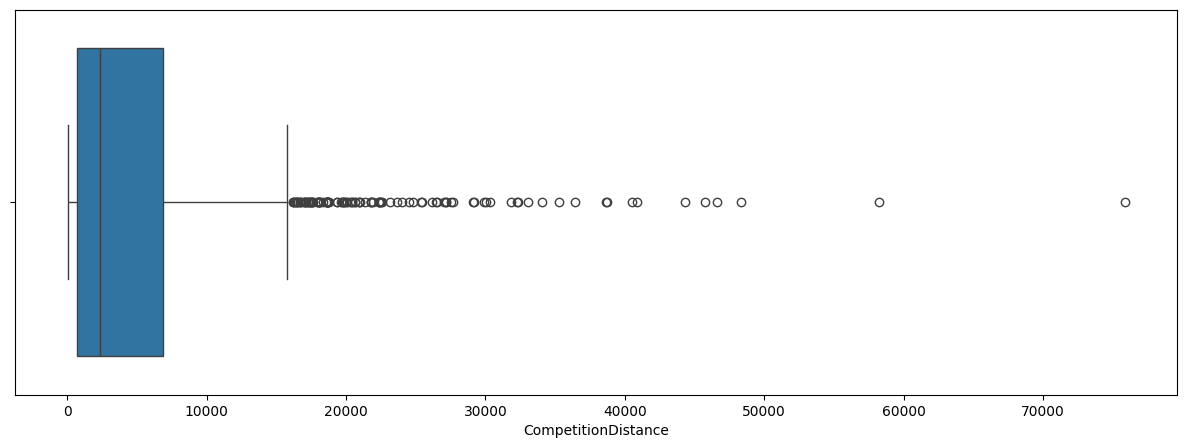

In [24]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

Để lấp đầy các giá trị null của CompetitionDistance, chúng ta có 4 tùy chọn:
1. Zero(0) >> Không hiệu quả vì các giá trị tương ứng cho CompetitionSinceMonth và CompetitionSinceYear không phải là không.
2. Mean >> Việc thay thế các giá trị null bằng trung bình sẽ gây ra sai lầm vì nó chứa các giá trị ngoại lai và trung bình bị ảnh hưởng bởi các giá trị ngoại lai.
3. Median >> Để có kết quả tốt, việc thay thế bằng trung vị có thể là sự lựa chọn tốt hơn.
4. Mode >> Mode cũng có thể giúp lấp đầy các giá trị null trong trường hợp của chúng ta.

Vì chúng ta có hai tùy chọn (Mode và Median) nên chúng ta sẽ chọn Median.

In [25]:
# filling null values
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace=True)

In [26]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                         0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                  0
dtype: object

In [27]:
# rechecking if we have any null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Tuyệt vời!! Chúng ta không còn giá trị null nào trong đặc điểm CompetitionDistance.

##### b). Xử lý các giá trị null từ tính năng **CompetitionOpenSinceMonth** và **CompetitionOpenSinceYear**.

In [28]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<Axes: xlabel='CompetitionOpenSinceMonth'>

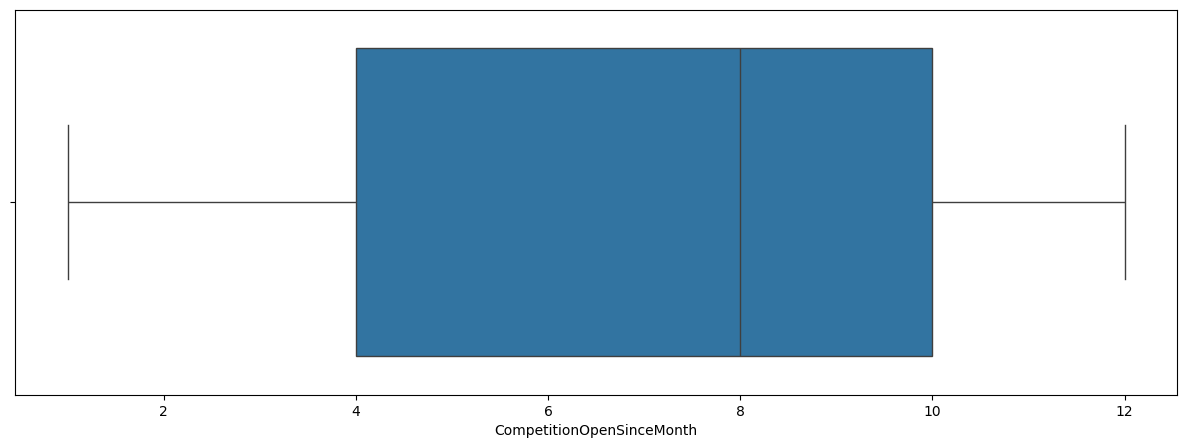

In [29]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(x=df_store["CompetitionOpenSinceMonth"])

<Axes: xlabel='CompetitionOpenSinceYear'>

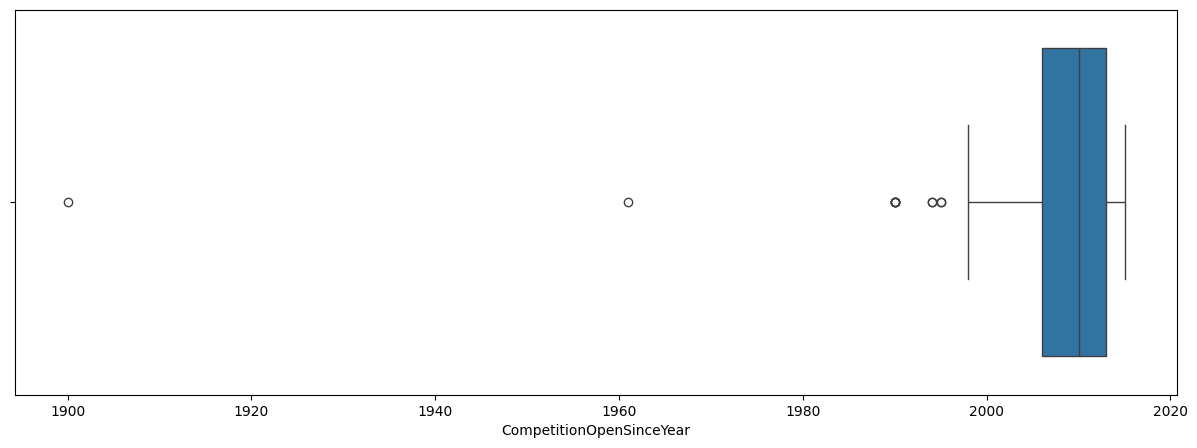

In [30]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(x=df_store["CompetitionOpenSinceYear"])

Điền các giá trị null của CompetitionOpenSinceMonth và CompetitionOpenSinceYear bằng Mode.

In [31]:
# filling null values of CompetitionOpenSinceMonth
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [32]:
# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [33]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### c). Xử lý các giá trị null từ các thuộc tính **Promo2SinceWeek**, **Promo2SinceYear** và **PromoInterval**.

Vì giá trị tương ứng khi Promo2 là 0 cho các tính năng Promo2SinceWeek, Promo2SinceYear và PromoInterval có giá trị null. Vì vậy, chúng tôi đang thay thế giá trị null bằng 0.

In [34]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0.
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [35]:
# rechecking if our features contains more null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Chúc mừng, chúng ta đã đạt được cột mốc đầu tiên bằng cách làm sạch tất cả các giá trị null/thiếu từ cả hai tập dữ liệu.

#### 2. Gộp tập dữ liệu

In [36]:
# checking shape of dataset using left join
df_left= pd.merge(df_rossmann, df_store, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df_rossmann, df_store, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(df_rossmann, df_store, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0


Vì chúng ta đang nhận được cùng một hình dáng và 0 giá trị null từ tất cả các phép nối, do đó chúng ta có thể sử dụng bất kỳ phép nối nào và nó sẽ không ảnh hưởng đến kết quả.

Chúng ta đang theo dõi phép nối bên trong cho phân tích tiếp theo của mình.

In [37]:
#using inner join for our further analysis
df= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [38]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### 3.Định kiểu

In [39]:
# Checking dtypes of all the variables of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [40]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y-%m-%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [41]:
# Verifying the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### Những thao tác gì và những hiểu biết nào bạn đã tìm thấy.

Trong việc xử lý dữ liệu, chúng tôi đã chia thành ba phần:


1.   **Điều trị giá trị null**:  Trong phần này, chúng tôi đã xử lý mọi giá trị null từ cả hai tập dữ liệu. Chúng tôi đã thực hiện các thay thế sau:


> a. Thay thế giá trị null của CompetitionDistance bằng MEDIAN.

> b. Thay thế giá trị null của CompetitionOpenSinceMonth bằng MODE.

> c. Thay thế giá trị null của CompetitionOpenSinceYear bằng MODE.

> d. Thay thế giá trị null của Promo2SinceWeek bằng 0.

> e. Thay thế giá trị null của Promo2SinceYear bằng 0.

> f.  Thay thế giá trị null của PromoInterval bằng 0.


2.   **Ghép các tập dữ liệu**: Chúng tôi không muốn làm giảm chất lượng và số lượng của tập dữ liệu của mình để đạt được độ chính xác tốt nhất trong việc thực hiện mô hình ML. Vì vậy, chúng tôi đã tự hỏi liệu có thể sử dụng join tốt nhất cho những kết quả tốt hơn hay không và chúng tôi đã biết từ R&D của mình rằng mọi join đều mang lại hình dạng giống nhau cho tập dữ liệu ghép của chúng tôi với 0 giá trị null. Vì vậy, chúng tôi đã quyết định sử dụng join nội bộ.

3.   **Định kiểu**: Trong phần định kiểu, chúng tôi đã định kiểu các tính năng sau để có thể hiển thị đúng cách và có thể đưa chúng làm đầu vào cho ML Model:


> a.  Định kiểu tính năng Date sang định dạng Datetime.

> b. Định kiểu các tính năng CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear sang kiểu Integer.












In [42]:
# Save the cleaned and merged DataFrame to a CSV file
df.to_csv(r"D:\IS403_project\rossmann-sales-forecasting-using-ml\processed_data\cleaned_data.csv", index=False)